In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [3]:
df = pd.read_csv('only_calls.csv')

In [10]:
df.head()

,primary_label,secondary_labels,type,latitude,longitude,scientific_name,common_name,author,license,rating,url,filename
0,abethr1,[],['call'],-2.9524,38.2921,Turdus tephronotus,African Bare-eyed Thrush,James Bradley,Creative Commons Attribution-NonCommercial-Sha...,3.5,https://www.xeno-canto.org/363501,abethr1/XC363501.ogg
1,abethr1,[],"['call', 'song']",-2.9524,38.2921,Turdus tephronotus,African Bare-eyed Thrush,James Bradley,Creative Commons Attribution-NonCommercial-Sha...,4.5,https://www.xeno-canto.org/363504,abethr1/XC363504.ogg
2,abethr1,[],"['call', 'song']",-2.9965,37.6244,Turdus tephronotus,African Bare-eyed Thrush,isaac kilusu,Creative Commons Attribution-NonCommercial-Sha...,3.0,https://www.xeno-canto.org/432639,abethr1/XC432639.ogg
3,abethr1,[],"['adult', 'call', 'sex uncertain', 'song']",-2.9858,37.5975,Turdus tephronotus,African Bare-eyed Thrush,isaac kilusu,Creative Commons Attribution-NonCommercial-Sha...,5.0,https://www.xeno-canto.org/639039,abethr1/XC639039.ogg
4,abhori1,['combul2'],"['call', 'song']",-15.9259,29.0292,Oriolus larvatus,African Black-headed Oriole,Rory Nefdt,Creative Commons Attribution-NonCommercial-Sha...,3.5,https://www.xeno-canto.org/120250,abhori1/XC120250.ogg


In [ ]:
print(df['type'].unique())

["['call']" "['call', 'song']"
 "['adult', 'call', 'sex uncertain', 'song']" "['Display call']"
 "['alarm call']" "['alarm call', 'call']" "['alarm call', 'song']"
 "['call', 'footsteps', 'wind']" "['call', 'female', 'male']"
 "['call', 'sex uncertain']" "['adult', 'call', 'sex uncertain']"
 "['adult', 'call', 'song']"
 "['adult', 'alarm call', 'call', 'sex uncertain', 'song']"
 "['call', 'flight call']" "['adult', 'flight call', 'sex uncertain']"
 "['call', 'female', 'flight call', 'male', 'song']" "['call', 'male']"
 "['flight call']" "['call', 'duet']" "['adult', 'call']"
 "['adult', 'flight call']" "['call,begging call,juvenile']"
 "['call', 'juvenile', 'sex uncertain']"
 "['call', 'life stage uncertain', 'sex uncertain']"
 "['call', 'female', 'male', 'song']"
 "['begging call', 'juvenile', 'sex uncertain']"
 "['call', 'sex uncertain', 'song']" "['call', 'juvenile']"
 "['call', 'juvenile', 'song']" "['call', 'female']"
 "['begging call', 'juvenile']" "['call', 'male', 'song']"
 "['

In [28]:
print(df['common_name'].nunique())

258


In [4]:
# Liste der relevanten Call-Arten
call_types = {"'call'"}  # Ergänze nach Bedarf

# Filtern der Spalte 'type'
filter_call = df[df["type"].apply(lambda x: any(call in call_types for call in x))]


In [12]:
print(len(filter_call))

0


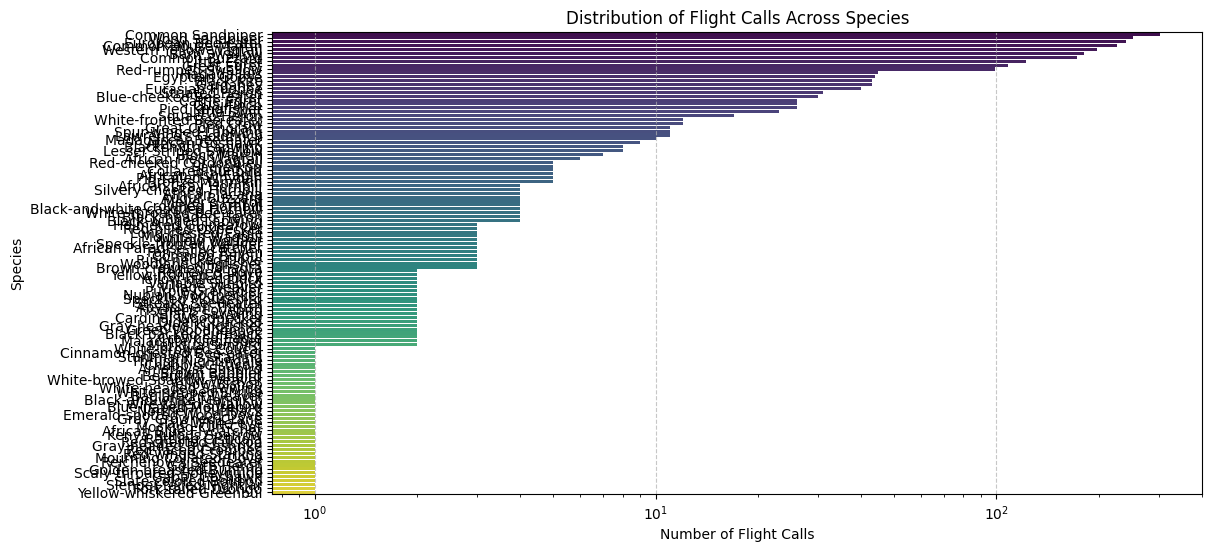

In [35]:

# Alle einzigartigen Arten aus dem Datensatz holen
species_list = df["common_name"].unique()

# Dataset filtern, um nur relevante Arten zu behalten
df_filtered = df[df["common_name"].isin(species_list)]

# Nur Einträge mit "alarm call" im Typ-Feld auswählen
df_alarm_calls = df_filtered[df_filtered["type"].str.contains(r"\bflight call\b", case=False, na=False)]

# Anzahl der Alarmrufe pro Art berechnen
alarm_call_counts = df_alarm_calls.groupby("common_name").size().reset_index(name="Flight Call Count")

# Sortieren für bessere Visualisierung
alarm_call_counts = alarm_call_counts.sort_values(by="Flight Call Count", ascending=False)

# Falls Daten vorhanden sind, visualisieren
if not alarm_call_counts.empty:
    plt.figure(figsize=(12, 6))
    sns.barplot(data=alarm_call_counts, x="Flight Call Count", y="common_name", palette="viridis")
    plt.xlabel("Number of Flight Calls")
    plt.ylabel("Species")
    plt.title("Distribution of Flight Calls Across Species")
    plt.grid(axis="x", linestyle="--", alpha=0.7)
    plt.xscale("log")

    plt.show()
else:
    print("No flight calls found for the specified species.")


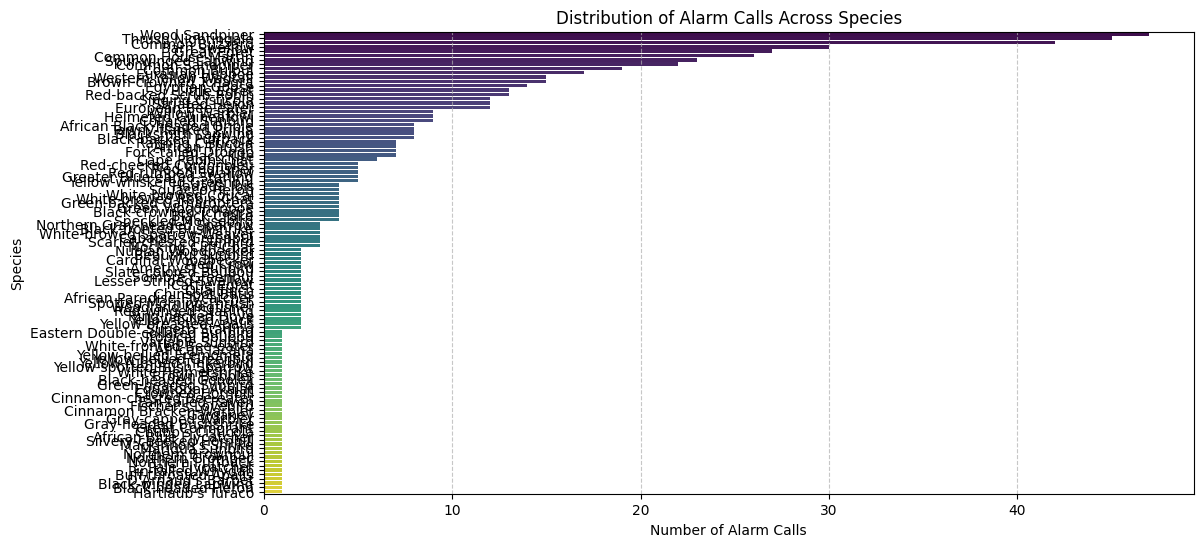

In [16]:

# Alle einzigartigen Arten aus dem Datensatz holen
species_list = df["common_name"].unique()

# Dataset filtern, um nur relevante Arten zu behalten
df_filtered = df[df["common_name"].isin(species_list)]

# Nur Einträge mit "alarm call" im Typ-Feld auswählen
df_alarm_calls = df_filtered[df_filtered["type"].str.contains(r"\balarm call\b", case=False, na=False)]

# Anzahl der Alarmrufe pro Art berechnen
alarm_call_counts = df_alarm_calls.groupby("common_name").size().reset_index(name="Alarm Call Count")

# Sortieren für bessere Visualisierung
alarm_call_counts = alarm_call_counts.sort_values(by="Alarm Call Count", ascending=False)

# Falls Daten vorhanden sind, visualisieren
if not alarm_call_counts.empty:
    plt.figure(figsize=(12, 6))
    sns.barplot(data=alarm_call_counts, x="Alarm Call Count", y="common_name", palette="viridis")
    plt.xlabel("Number of Alarm Calls")
    plt.ylabel("Species")
    plt.title("Distribution of Alarm Calls Across Species")
    plt.grid(axis="x", linestyle="--", alpha=0.7)



    plt.show()


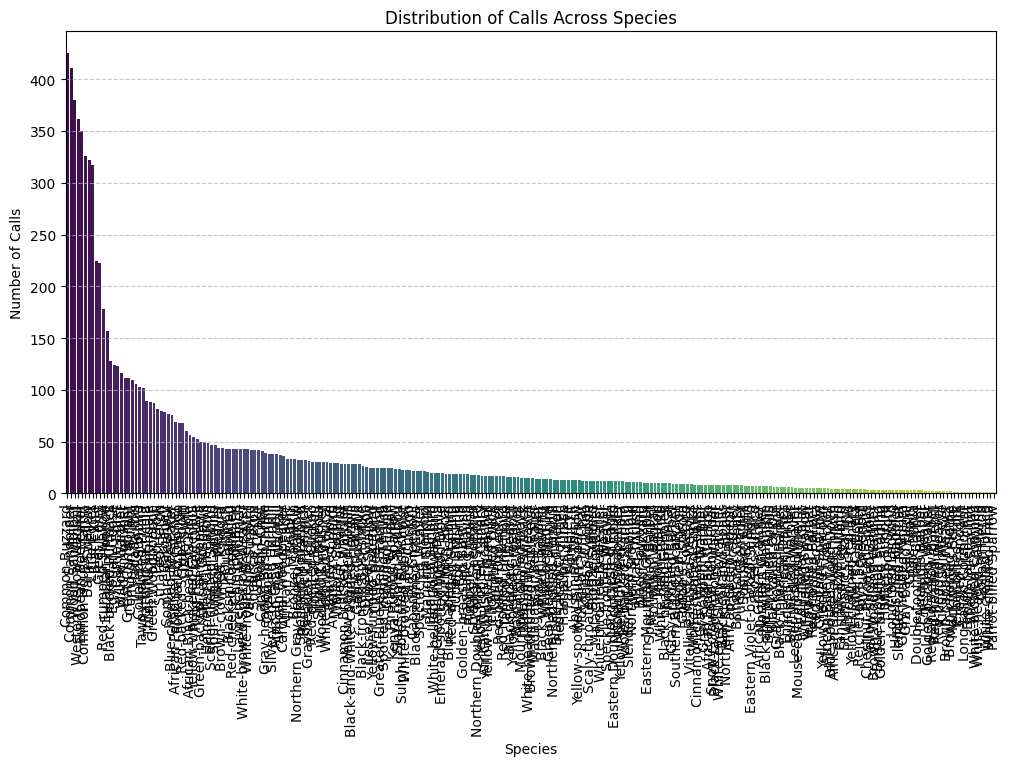

                common_name  Call Count
70           Common Buzzard         425
72         Common Sandpiper         411
241          Wood Sandpiper         380
223  Western Yellow Wagtail         362
86       European Bee-eater         350
71      Common House-Martin         326
20             Barn Swallow         322
129            Little Egret         317
24               Black Kite         225
107             Great Egret         223
179      Red-rumped Swallow         178
85          Eurasian Hoopoe         157
28    Black-backed Puffback         128
82           Egyptian Goose         124
60             Cattle Egret         123
239          Willow Warbler         116
160         Pied Kingfisher         112
106         Great Cormorant         112
69            Common Bulbul         110
113             Hadada Ibis         106
68         Collared Sunbird         103
215    Tawny-flanked Prinia         102


In [20]:

# Alle einzigartigen Arten aus dem Datensatz holen
species_list = df["common_name"].unique()

# Dataset filtern, um nur relevante Arten zu behalten
df_filtered = df[df["common_name"].isin(species_list)]

# Nur Einträge mit "alarm call" im Typ-Feld auswählen
df_alarm_calls = df_filtered[df_filtered["type"].str.contains(r"\bcall\b", case=False, na=False)]

# Anzahl der Alarmrufe pro Art berechnen
alarm_call_counts = df_alarm_calls.groupby("common_name").size().reset_index(name="Call Count")

# Sortieren für bessere Visualisierung
alarm_call_counts = alarm_call_counts.sort_values(by="Call Count", ascending=False)

# Falls Daten vorhanden sind, visualisieren
if not alarm_call_counts.empty:
    plt.figure(figsize=(12, 6))
    sns.barplot(data=alarm_call_counts, x="common_name", y="Call Count", palette="viridis")
    plt.xlabel("Species")
    plt.ylabel("Number of Calls")
    plt.xticks(rotation=90)
    plt.title("Distribution of Calls Across Species")
    plt.grid(axis="y", linestyle="--", alpha=0.7)
    plt.show()



    # Display the first 22 unique species in a table
    first_22_species = alarm_call_counts.head(22)
    print(first_22_species)

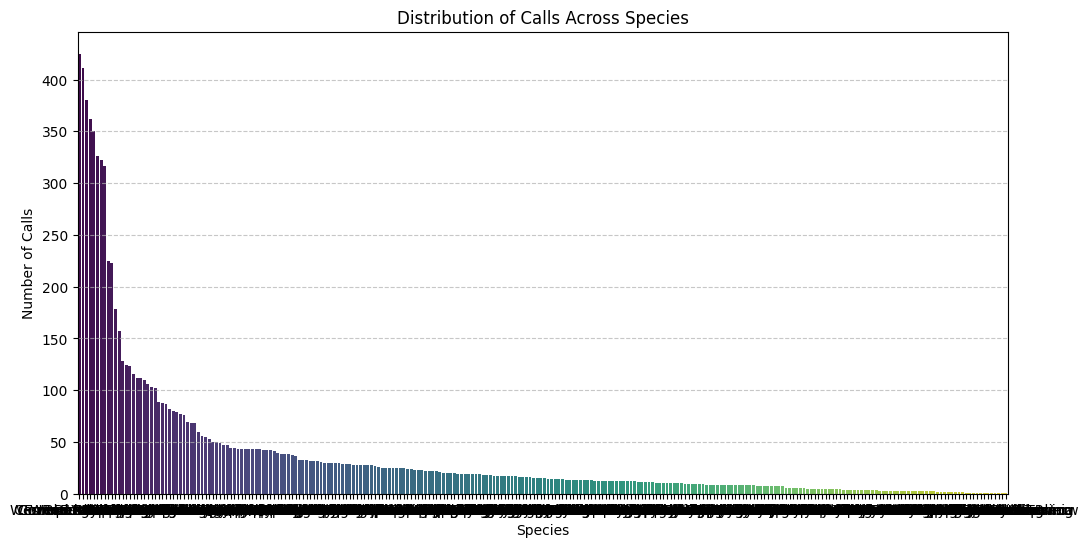

In [11]:

# Alle einzigartigen Arten aus dem Datensatz holen
species_list = df["common_name"].unique()

# Dataset filtern, um nur relevante Arten zu behalten
df_filtered = df[df["common_name"].isin(species_list)]

# Nur Einträge mit "alarm call" im Typ-Feld auswählen
df_alarm_calls = df_filtered[df_filtered["type"].str.contains(r"\bcall\b", case=False, na=False)]

# Anzahl der Alarmrufe pro Art berechnen
alarm_call_counts = df_alarm_calls.groupby("common_name").size().reset_index(name="Call Count")

# Sortieren für bessere Visualisierung
alarm_call_counts = alarm_call_counts.sort_values(by="Call Count", ascending=False)

# Falls Daten vorhanden sind, visualisieren
if not alarm_call_counts.empty:

    plt.figure(figsize=(12, 6))
    sns.barplot(data=alarm_call_counts, x="common_name", y="Call Count", palette="viridis")
    plt.xlabel("Species")
    plt.ylabel("Number of Calls")
    plt.xticks(rotation=0)
    plt.title("Distribution of Calls Across Species")
    plt.grid(axis="y", linestyle="--", alpha=0.7)
    #plt.xscale("log")

    plt.show()
else:
    print("No  calls found for the specified species.")


In [23]:
# Define the call types to sum up
call_types_to_sum = [
    "call",
    "flight call",
    "nocturnal flight call",
    "alarm call",
    "roosting calls",
    "single-note call",
    "two-note call",
    "aggression call",
    "begging call",
    "adult call",
    "Youngs calls",
    "advertising call",
    "agonistic call",
    "anxiety call",
    "display call",
    "descending call",
    "distress call",
    "duck call",
    "excitement call",
    "feeding call",
    "long call",
    "mating call",
    "migration call",
    "modulated call",
    "night flight call",
    "raspy call",
    "roaring calls",
    "nesting call",


]

# Initialize a dictionary to store the counts
call_counts = {call_type: 0 for call_type in call_types_to_sum}

# Iterate over each call type and sum up the counts
for call_type in call_types_to_sum:
    call_counts[call_type] = df[df["type"].str.contains(call_type, case=False, na=False)].shape[0]

# Print the results
for call_type, count in call_counts.items():
    print(f"{call_type}: {count}")

call: 9430
flight call: 2589
nocturnal flight call: 419
alarm call: 652
roosting calls: 3
single-note call: 8
two-note call: 4


In [24]:
# Count the occurrences of each common_name
common_name_counts = df['common_name'].value_counts()
#print(common_name_counts)
common_name_counts.head(23)


common_name
Common Buzzard            425
Common Sandpiper          412
Wood Sandpiper            381
Western Yellow Wagtail    362
European Bee-eater        350
Common House-Martin       328
Barn Swallow              323
Little Egret              318
Black Kite                227
Great Egret               227
Red-rumped Swallow        178
Eurasian Hoopoe           158
Cattle Egret              129
Black-backed Puffback     128
Egyptian Goose            124
Willow Warbler            116
Great Cormorant           113
Pied Kingfisher           112
Common Bulbul             110
Hadada Ibis               106
Collared Sunbird          103
Tawny-flanked Prinia      102
Rattling Cisticola         89
Name: count, dtype: int64

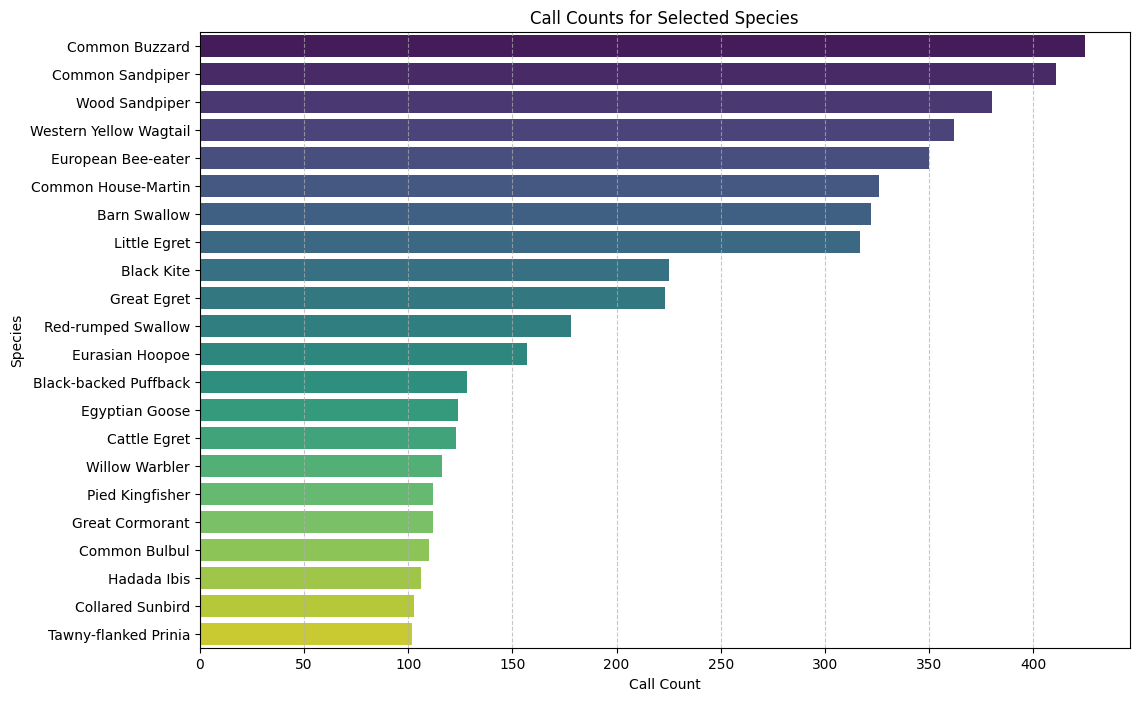

In [26]:
# Filter the alarm_call_counts DataFrame to include only the specified species
species_to_plot = [
    'Common Buzzard', 'Common Sandpiper', 'Wood Sandpiper', 'Western Yellow Wagtail', 
    'European Bee-eater', 'Common House-Martin', 'Barn Swallow', 'Little Egret', 
    'Black Kite', 'Great Egret', 'Red-rumped Swallow', 'Eurasian Hoopoe', 
    'Cattle Egret', 'Black-backed Puffback', 'Egyptian Goose', 'Willow Warbler', 
    'Great Cormorant', 'Pied Kingfisher', 'Common Bulbul', 'Hadada Ibis', 
    'Collared Sunbird', 'Tawny-flanked Prinia'
]

# Filter the DataFrame
filtered_alarm_call_counts = alarm_call_counts[alarm_call_counts['common_name'].isin(species_to_plot)]

# Plot the stacked bar chart
plt.figure(figsize=(12, 8))
sns.barplot(x='Call Count', y='common_name', data=filtered_alarm_call_counts, palette='viridis')

# Add labels and title
plt.xlabel('Call Count')
plt.ylabel('Species')
plt.title('Call Counts for Selected Species')
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Show the plot
plt.show()